# Predictions with various types of ML models

In this second part i'll use machine learning models to make predictions and submission to see my score for this challenge. 
- At first i'll use linear regressorts, then the SVM model with 2 different kernels. 
- Then, later i'll see if random forrest and gradient boosting libs are more effective
- At the end, i'll try to use deep learning models such as RNN and especially GRU.

## Data preparation

Some parts of the data set have aldready been prepared in the first notebook / blogpost, and saved as different csv file. Anyway i'll reuse the same function in order to prepare the data for the deep learning models (see below).

First let's import all the libraries needed, set up notebook parameter, create file / folder paths and load the data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, ElasticNet, ridge_regression, LinearRegression, Ridge
from sklearn.svm import SVR

In [4]:
input_dir = os.path.join('..', 'input')
output_dir = os.path.join('..', 'output')

In [5]:
# each id is unique so we can use this column as index
X_train_1 = pd.read_csv(os.path.join(output_dir, "X_train_1.csv"))
X_train_2 = pd.read_csv(os.path.join(output_dir, "X_train_2.csv"))
X_test_1 = pd.read_csv(os.path.join(output_dir, "X_test_1.csv"))
X_test_2 = pd.read_csv(os.path.join(output_dir, "X_test_2.csv"))
X_train_1.head()

,temp_1,mean_national_temp,humidity_1,consumption_secondary_1,consumption_secondary_2,consumption_secondary_3,day of year,vacances_zone_a,vacances_zone_b,vacances_zone_c,est_jour_ferie,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,week of year_2,week of year_3,week of year_4,week of year_5,week of year_6,week of year_7,week of year_8,week of year_9,week of year_10,week of year_11,week of year_12,week of year_13,week of year_14,week of year_15,week of year_16,week of year_17,week of year_18,week of year_19,week of year_20,week of year_21,week of year_22,week of year_23,...,week of year_26,week of year_27,week of year_28,week of year_29,week of year_30,week of year_31,week of year_32,week of year_33,week of year_34,week of year_35,week of year_36,week of year_37,week of year_38,week of year_39,week of year_40,week of year_41,week of year_42,week of year_43,week of year_44,week of year_45,week of year_46,week of year_47,week of year_48,week of year_49,week of year_50,week of year_51,week of year_52,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.356234,0.428571,0.936709,0.155263,0.208451,0.155462,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.348601,0.428571,0.974684,0.150000,0.169014,0.142857,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.318066,0.425249,0.962025,0.152632,0.169014,0.147059,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.335878,0.421927,0.987342,0.144737,0.169014,0.142857,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.300254,0.418605,0.974684,0.184211,0.169014,0.147059,306,1,1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X_test_1.head()

,temp_1,mean_national_temp,humidity_1,consumption_secondary_1,consumption_secondary_2,consumption_secondary_3,day of year,vacances_zone_a,vacances_zone_b,vacances_zone_c,est_jour_ferie,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,week of year_2,week of year_3,week of year_4,week of year_5,week of year_6,week of year_7,week of year_8,week of year_9,week of year_10,week of year_11,week of year_12,week of year_13,week of year_14,week of year_15,week of year_16,week of year_17,week of year_18,week of year_19,week of year_20,week of year_21,week of year_22,week of year_23,...,week of year_26,week of year_27,week of year_28,week of year_29,week of year_30,week of year_31,week of year_32,week of year_33,week of year_34,week of year_35,week of year_36,week of year_37,week of year_38,week of year_39,week of year_40,week of year_41,week of year_42,week of year_43,week of year_44,week of year_45,week of year_46,week of year_47,week of year_48,week of year_49,week of year_50,week of year_51,week of year_52,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.315315,0.368750,0.884615,0.202381,0.380665,0.189583,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.322072,0.365625,0.858974,0.200000,0.350453,0.179167,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.322072,0.365625,0.846154,0.214286,0.353474,0.185417,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.299550,0.362500,0.871795,0.219048,0.347432,0.177083,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.281532,0.359375,0.871795,0.221429,0.347432,0.183333,305,1,1,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's verify the shape (nb of lines and columns) of the various data sets

In [7]:
X_train_1.shape, X_train_2.shape, X_test_1.shape, X_test_2.shape

((8760, 102), (8760, 102), (8736, 102), (8736, 102))

An overview of the test data set use to make submissions for the challenge :

In [8]:
y_train_1 = pd.read_csv("../output/y_train_1.csv", header=None)
y_train_2 = pd.read_csv("../output/y_train_2.csv", header=None)
y_train_1.head()

,0
0,100
1,101
2,100
3,101
4,100


In [9]:
y_train_1.shape, y_train_2.shape

((8760, 1), (8760, 1))

## Metric / Benchmark

For this challenge we used the mean absolute error.

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier dstricts. In that case, you may consider using the Mean Absolute Error.

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

* Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the l 2 norm, noted ∥ · ∥ 2 (or just ∥ · ∥).

* Computing the sum of absolutes (MAE) corresponds to the l 1 norm, noted ∥ · ∥ 1 . It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

The RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.


In [10]:
def weighted_mean_absolute_error(y_true, y_pred):
    """ Simplified version without loading csv for testing purposes on train sets"""
    c12 = np.array([1136987, 1364719])
    return 2 * mean_absolute_error(y_true*c12[0], y_pred*c12[1]) / np.sum(c12)

On the assumption that a safety reserve of 20% is needed to covert the supply

## Functions to print/show predictions and make submissions

Please refer to the doc string of each function to know what's its purpose, name should be self explanatory :

In [11]:
def print_metric_on_train(fitted_model_1, fitted_model_2):
    """ prints and returns the metric on the train datasets"""
    
    y_train_pred_1, y_train_pred_2 = fitted_model_1.predict(X_train_1), fitted_model_2.predict(X_train_2)
    # arg = dataframe_1_y_true, dataframe_2_y_pred
    
    wmae_1 = weighted_mean_absolute_error(y_train_1, y_train_pred_1)
    wmae_2 = weighted_mean_absolute_error(y_train_2, y_train_pred_2)
    
    print(f'weighted_mean_absolute_error on X_train_1 : {wmae_1}')
    print(f'weighted_mean_absolute_error on X_train_2 : {wmae_2}')
    
    return wmae_1, wmae_2, y_train_pred_1, y_train_pred_2

In [32]:
def display_pred_on_train(y_train, y_train_pred):
    """ plots the prediction and the target of the ONE train data sets in order to see how the model has learnt"""
      
    plt.figure(figsize=(10, 5))
    plt.title("Real & Predicted Consumption Evolution for ONE site over a year")
    sns.lineplot(x=y_train.index, y=y_train[0], label='truth')
    #sns.lineplot(x=y_train.index, y=y_train_pred[:, 0], label='prediction')
    sns.lineplot(x=y_train.index, y=y_train_pred, label='prediction')
    plt.show()

In [13]:
def create_submission(fitted_model_1, fitted_model_2, model_name):
    """ make the prediction on the test set and craft the specific csv file to be submitted"""

    y_pred_1 = pd.DataFrame(fitted_model_1.predict(X_test_1).astype(int))
    y_pred_2 = pd.DataFrame(fitted_model_2.predict(X_test_2).astype(int))

    #y_pred_1, y_pred_2 = 1.2 * y_pred_1, 1.2 * y_pred_2 # no need of 20% more
    res = pd.concat((y_pred_1, y_pred_2), axis=1)
    res.columns = ['consumption_1', 'consumption_2']
    res = res.set_index(pd.Index(range(8760, 17496)))
    res.index.name = 'ID'
    
    name = 'y_pred_' + model_name + '_.csv' 
    res.to_csv(os.path.join(output_dir, name), sep=',', index=True)
    
    return y_pred_1, y_pred_2

In [14]:
def general_wrapper(fitted_model_1, fitted_model_2, model_name, y_train_1, y_train_2):
    """ wrapper of the 3 functions above, so you only have to call this function instead"""
    
    wmae_1, wmae_2, y_train_pred_1, y_train_pred_2 = print_metric_on_train(fitted_model_1, fitted_model_2)    
    display_pred_on_train(y_train_1, y_train_pred_1)
    display_pred_on_train(y_train_2, y_train_pred_2)
    create_submission(fitted_model_1, fitted_model_2, model_name)
    
    return wmae_1, wmae_2

## Side note

Remember that there is a difference in the length of the two dataframes X_train & X_test : there are 24 lines (hours) more wich correspond to one day, because 2016 was a leap year

---
# Linear regression and Support Vector Machine

Here is a king of decision tree for choosing the right model :

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

* samples nb > 100k
    * SGD regressor
* samples nb < 100k
    * Few features should be important : YES:
        * Lasso
        * ElasticNet
    * Few features should be important : NO:
        * RidgeRegression
        * SVR(kernel='linear')
        If not working
        * SVR(kernel='rbf')
        * Ensemble regressor

## Linear reg

weighted_mean_absolute_error on X_train_1 : 26.05531062095511
weighted_mean_absolute_error on X_train_2 : 28.69959036370805


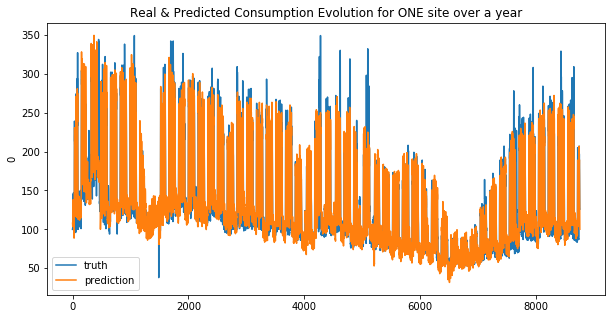

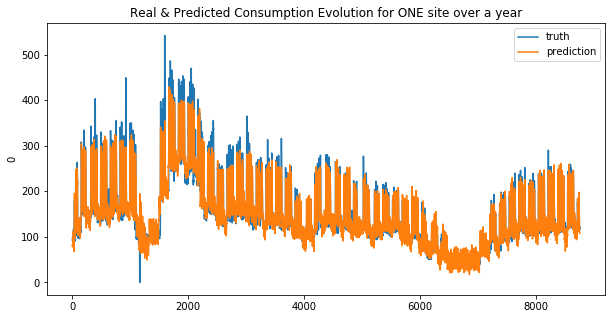

In [23]:
linear_base_1, linear_base_2 = LinearRegression(), LinearRegression()
linear_base_1.fit(X_train_1, y_train_1)
linear_base_2.fit(X_train_2, y_train_2)
res_lin_reg_1, res_lin_reg_2 = general_wrapper(linear_base_1, linear_base_2, 'linear_reg', y_train_1, y_train_2)

Your submission score is : 19.24

We can see that the linear regression model doesn't make good predictions for spikes... this is more obvious for the second site. And that why the MAE was choosen !

## Lasso

weighted_mean_absolute_error on X_train_1 : 26.061965525312893
weighted_mean_absolute_error on X_train_2 : 28.710534100722768


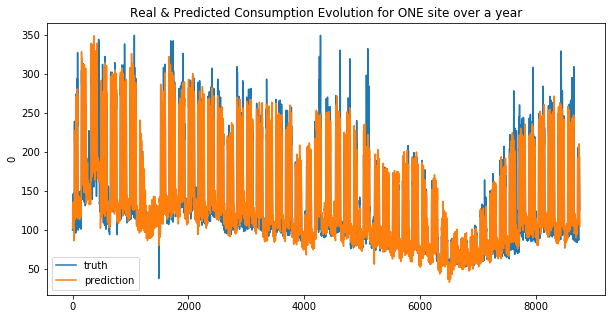

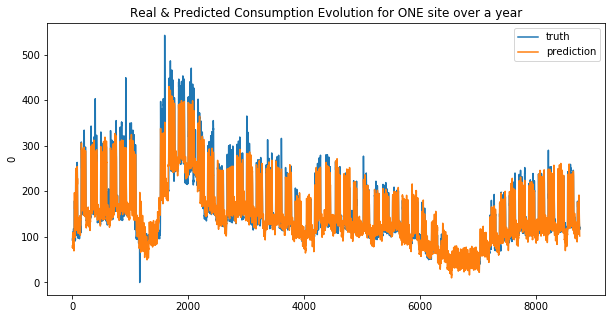

In [26]:
lasso_base_1, lasso_base_2 = Lasso(alpha=0.01, max_iter=10e5), Lasso(alpha=0.01, max_iter=10e5)
lasso_base_1.fit(X_train_1, y_train_1)
lasso_base_2.fit(X_train_2, y_train_2)
res_lasso_1, res_lasso_2 = general_wrapper(lasso_base_1, lasso_base_2, 'lasso', y_train_1, y_train_2)

Your submission score is : 23.70

### ElasticNet

weighted_mean_absolute_error on X_train_1 : 26.16342615122434
weighted_mean_absolute_error on X_train_2 : 31.322618027652748


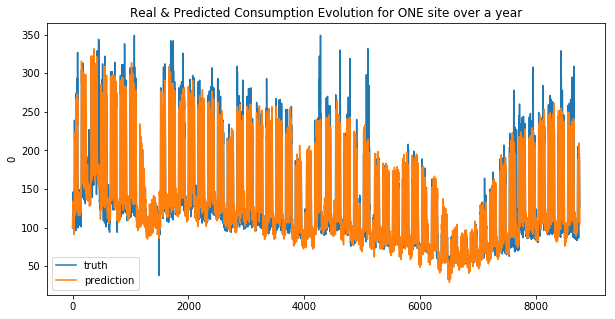

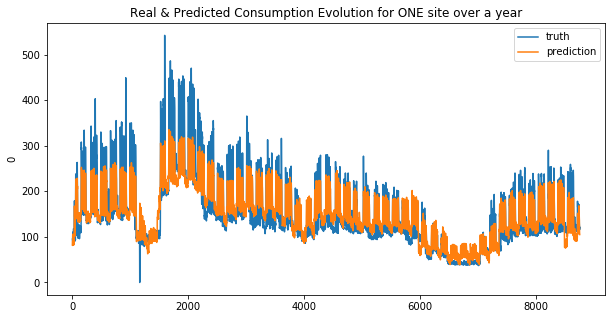

In [27]:
elast_base_1, elast_base_2 = ElasticNet(alpha=0.01, max_iter=10e8), ElasticNet(alpha=0.1, max_iter=10e8)
elast_base_1.fit(X_train_1, y_train_1)
elast_base_2.fit(X_train_2, y_train_2)
res_elasticnet_1, res_elasticnet_2 = general_wrapper(elast_base_1, elast_base_2, 'elastic_net', y_train_1, y_train_2)

Your submission score is : 23.70

## RidgeRegression

weighted_mean_absolute_error on X_train_1 : 26.055361466167927
weighted_mean_absolute_error on X_train_2 : 28.695385473745706


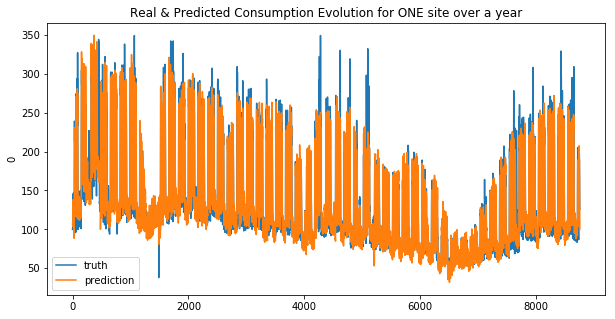

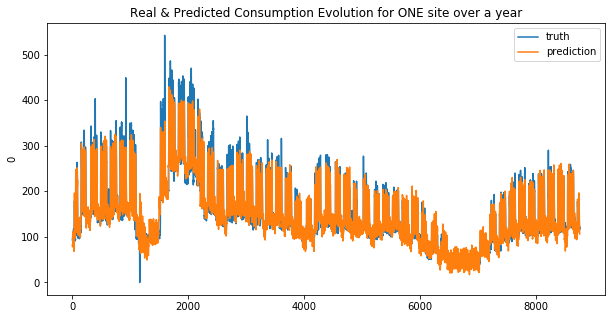

In [30]:
ridge_base_1, ridge_base_2 = Ridge(alpha=0.1, max_iter=10e10), Ridge(alpha=0.1, max_iter=10e10)
ridge_base_1.fit(X_train_1, y_train_1)
ridge_base_2.fit(X_train_2, y_train_2)
create_submission(ridge_base_1, ridge_base_2, 'ridge_reg')
res_ridge_1, res_ridge_2 = general_wrapper(ridge_base_1, ridge_base_2, 'ridge_reg', y_train_1, y_train_2)

Your submission score is : 23.70

## SVR(kernel='linear')

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 24.78463504218071
weighted_mean_absolute_error on X_train_2 : 26.999353814493194


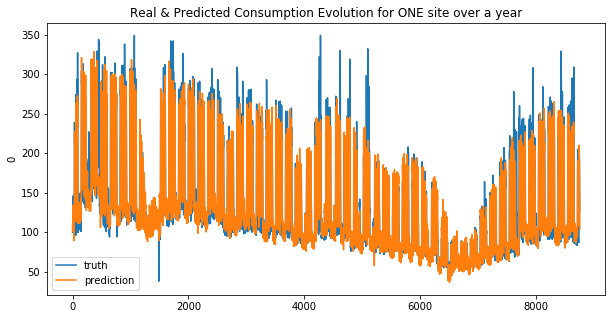

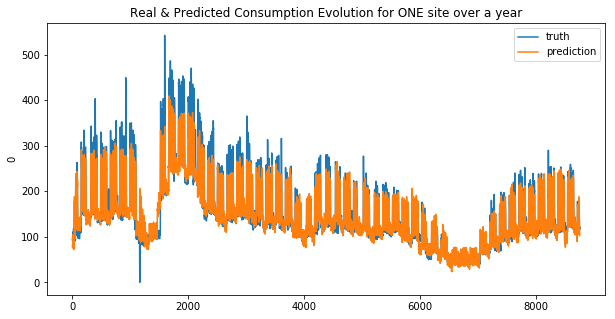

In [33]:
svr_base_1 = SVR(kernel='linear')
svr_base_2 = SVR(kernel='linear')
svr_base_1.fit(X_train_1, y_train_1)
svr_base_2.fit(X_train_2, y_train_2)
res_svr_1, res_svr_2 = general_wrapper(svr_base_1, svr_base_2, 'svr_lin', y_train_1, y_train_2)

Your submission score is : 21.906794341911045

## SVR(kernel='rbf')

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 39.22806743679658
weighted_mean_absolute_error on X_train_2 : 33.98994529863917


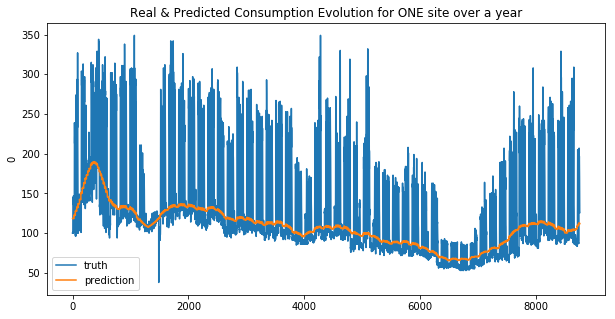

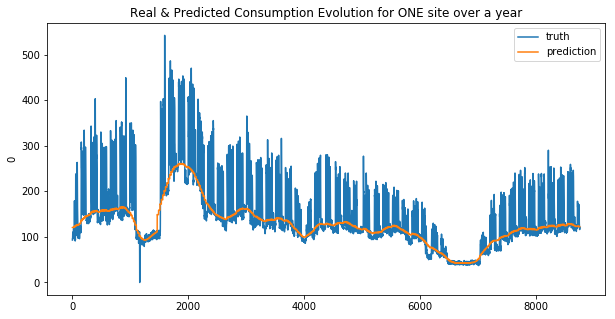

In [34]:
#svr_base_1 = SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr_base_rbf_1 = SVR(kernel='rbf')
svr_base_rbf_2 = SVR(kernel='rbf')
svr_base_rbf_1.fit(X_train_1, y_train_1)
svr_base_rbf_2.fit(X_train_2, y_train_2)
res_svr_base_rbf_1, res_svr_base_rbf_2 = general_wrapper(svr_base_rbf_1, svr_base_rbf_2, 'svr_base_rbf', y_train_1, y_train_2)

Your submission score is : 23.70

---
# Using other models (random forrest type)

In [36]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor

## Adaboost Regressor

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 42.93679688417296
weighted_mean_absolute_error on X_train_2 : 46.10227435920769


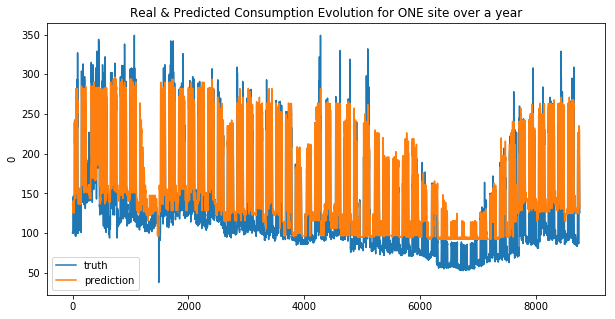

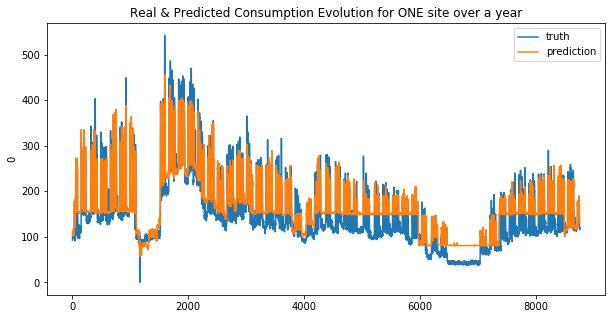

In [37]:
adaboost_base_1, adaboost_base_2 = AdaBoostRegressor(), AdaBoostRegressor()
adaboost_base_1.fit(X_train_1, y_train_1)
adaboost_base_2.fit(X_train_2, y_train_2)
res_adaboost_1, res_adaboost_2 = general_wrapper(adaboost_base_1, adaboost_base_2, 'adaboost_reg', y_train_1, y_train_2)

Your submission score is : 30.29205877610584

## GradientBoosting Regressor

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


weighted_mean_absolute_error on X_train_1 : 25.6597272086074
weighted_mean_absolute_error on X_train_2 : 27.55942042756231


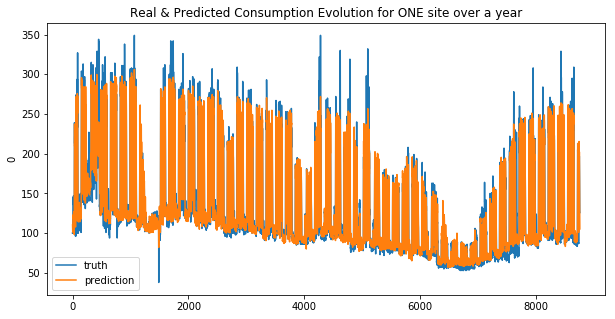

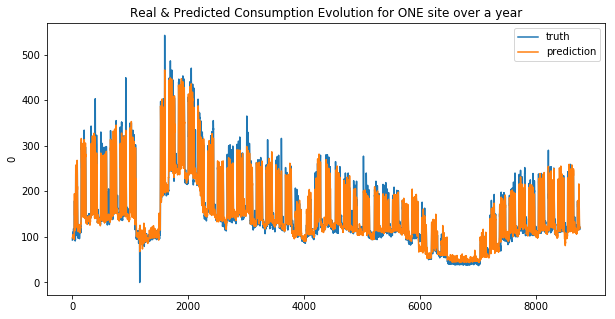

In [38]:
gbreg_base_1, gbreg_base_2 = GradientBoostingRegressor(), GradientBoostingRegressor()
gbreg_base_1.fit(X_train_1, y_train_1)
gbreg_base_2.fit(X_train_2, y_train_2)
res_gbreg_1, res_gbreg_2 = general_wrapper(gbreg_base_1, gbreg_base_2, 'gradientboost_reg', y_train_1, y_train_2)

Your submission score is : ??????

## RandomForestRegressor

/home/sunflowa/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/sunflowa/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


weighted_mean_absolute_error on X_train_1 : 25.072702321232793
weighted_mean_absolute_error on X_train_2 : 27.064664489582444


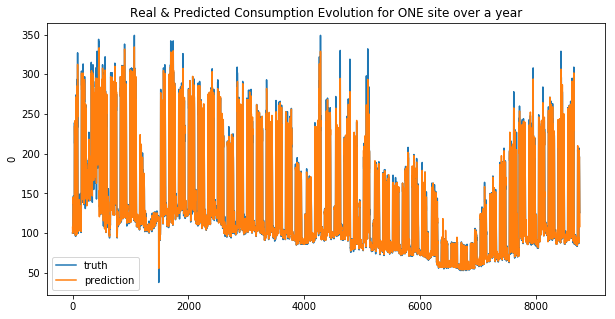

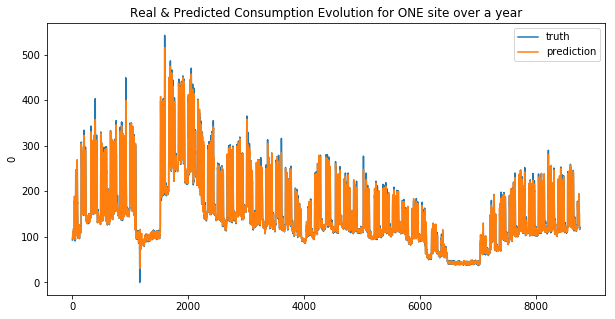

In [39]:
rfreg_base_1, rfreg_base_2 = RandomForestRegressor(), RandomForestRegressor()
rfreg_base_1.fit(X_train_1, y_train_1)
rfreg_base_2.fit(X_train_2, y_train_2)
res_rfreg_1, res_rfreg_2 = general_wrapper(rfreg_base_1, rfreg_base_2, 'randomforrest_reg', y_train_1, y_train_2)

Your submission score is : ??????

## ExtraTreesRegressor

/home/sunflowa/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/sunflowa/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


weighted_mean_absolute_error on X_train_1 : 25.042457117491335
weighted_mean_absolute_error on X_train_2 : 27.041557371295493


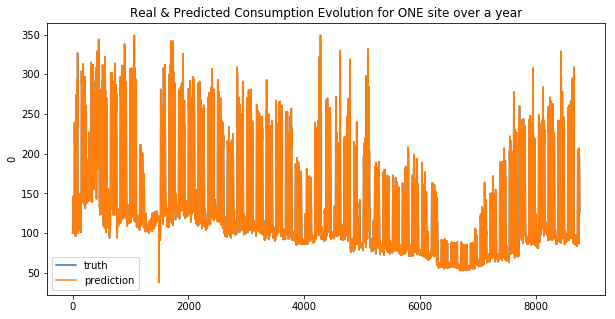

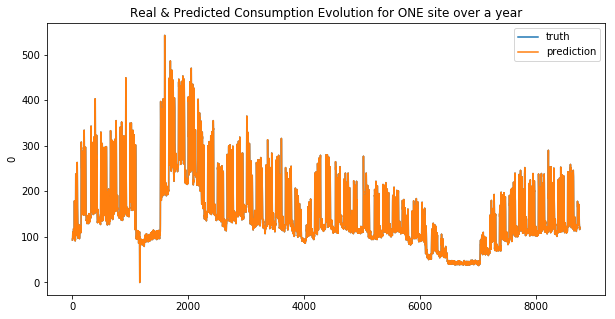

In [40]:
etreg_base_1, etreg_base_2 = ExtraTreesRegressor(), ExtraTreesRegressor()
etreg_base_1.fit(X_train_1, y_train_1)
etreg_base_2.fit(X_train_2, y_train_2)
res_etreg_1, res_etreg_2 = general_wrapper(etreg_base_1, etreg_base_2, 'extratree_reg', y_train_1, y_train_2)

Your submission score is : ??????

---

import other libraries

In [41]:
import xgboost as xgb
import lightgbm as lgbm

## XGBoost Regressor

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

https://xgboost.readthedocs.io/en/latest/

weighted_mean_absolute_error on X_train_1 : 25.670042893699705
weighted_mean_absolute_error on X_train_2 : 27.57397787858485


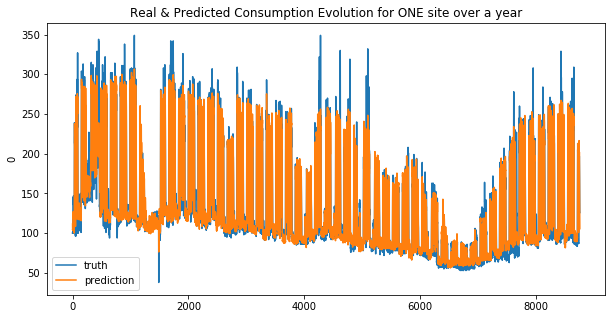

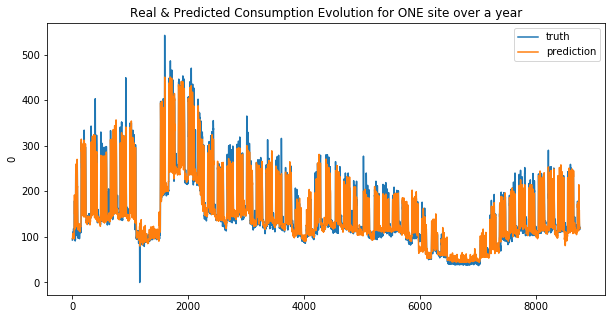

In [42]:
xgbreg_base_1, xgbreg_base_2 = xgb.XGBRegressor(), xgb.XGBRegressor()
xgbreg_base_1.fit(X_train_1, y_train_1)
xgbreg_base_2.fit(X_train_2, y_train_2)
res_xgbreg_1, res_xgbreg_2 = general_wrapper(xgbreg_base_1, xgbreg_base_2, 'xgb_reg', y_train_1, y_train_2)

Your submission score is : ??????

## Light GBM Regressor

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
https://lightgbm.readthedocs.io/en/latest/
    
    - Faster training speed and higher efficiency.
    - Lower memory usage.
    - Better accuracy.
    - Support of parallel and GPU learning.
    - Capable of handling large-scale data.

For more details, please refer to [Features](https://lightgbm.readthedocs.io/en/latest/Features.rst).

weighted_mean_absolute_error on X_train_1 : 25.169500507539915
weighted_mean_absolute_error on X_train_2 : 27.088282579499793


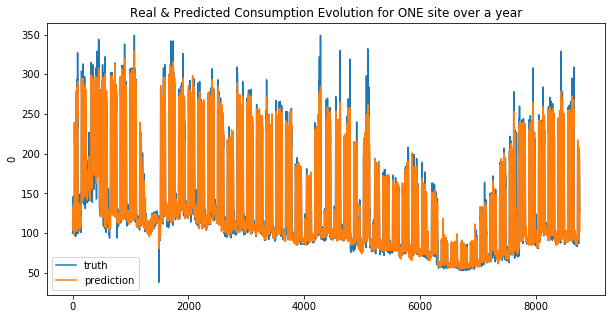

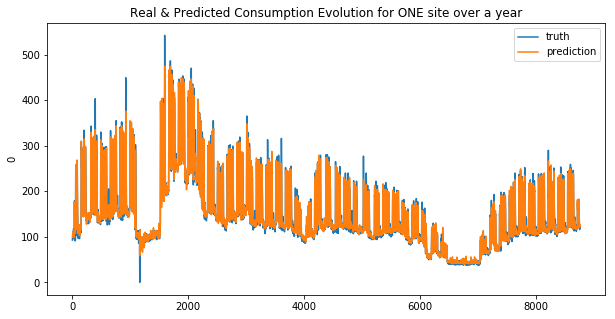

In [43]:
lgbmreg_base_1, lgbmreg_base_2 = lgbm.LGBMRegressor(), lgbm.LGBMRegressor()
lgbmreg_base_1.fit(X_train_1, y_train_1)
lgbmreg_base_2.fit(X_train_2, y_train_2)
res_lgbmreg_1, res_lgbmreg_2 = general_wrapper(lgbmreg_base_1, lgbmreg_base_2, 'lgbm_reg', y_train_1, y_train_2)

Your submission score is : ??????

---

# Using Recurrent Neural Networks

let's import all the needed libs from tensorflow / keras

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, GRU

A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

The term "recurrent neural network" is used indiscriminately to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that can not be unrolled.

Both finite impulse and infinite impulse recurrent networks can have additional stored state, and the storage can be under direct control by the neural network. The storage can also be replaced by another network or graph, if that incorporates time delays or has feedback loops. Such controlled states are referred to as gated state or gated memory, and are part of long short-term memory networks (LSTMs) and gated recurrent units.This is also called Feedback Neural Network. 

https://en.wikipedia.org/wiki/Recurrent_neural_network

## Data preparation

same as before in the 1st part : see intro & EDA

In [55]:
def transform_datetime_infos(data_frame):
    data_frame['datetime'] = pd.to_datetime(data_frame['timestamp'])
    data_frame['month'] = data_frame['datetime'].dt.month
    data_frame['week of year'] = data_frame['datetime'].dt.weekofyear
    data_frame['day of year'] = data_frame['datetime'].dt.dayofyear
    data_frame['day'] = data_frame['datetime'].dt.weekday_name
    data_frame['hour'] = data_frame['datetime'].dt.hour
    # for merging purposes
    data_frame['date'] = data_frame['datetime'].dt.strftime('%Y-%m-%d')
    return data_frame


def merge_infos(data_frame):
    data_frame = pd.merge(data_frame, holidays, on='date', how='left')
    data_frame = pd.merge(data_frame, jf, on='date', how='left')
    return data_frame


def cleaning_data(data_frame):
    # The Nan values of the column "est_jour_ferie" correspond to working days 
    # because in the dataset merged with, there is only non working days 
    data_frame['est_jour_ferie'] = data_frame['est_jour_ferie'].fillna(0)
    # At first, missing values in the temperatures and humidity columns are replaced by the median ones
    # later another approach with open data of means of the corresponding months will be used
    for c in ['temp_1', 'temp_2', 'humidity_1', 'humidity_2']:
        data_frame[c] = data_frame[c].fillna(data_frame[c].median())
    return data_frame


feat_to_drop = [
'timestamp',
'loc_1',
'loc_2',
'loc_secondary_1',
'loc_secondary_2',
'loc_secondary_3',
'datetime',
'date']


feat_to_scale = [
'temp_1',
'temp_2',
'mean_national_temp',
'humidity_1',
'humidity_2',
'consumption_secondary_1',
'consumption_secondary_2',
'consumption_secondary_3']


feat_to_dummies = [
'day',
'month',
'week of year',
#'day of year',
'hour']


def prepare_feat_df(data_frame):
    data_frame = data_frame.drop(columns=feat_to_drop)
    data_frame[feat_to_scale] = StandardScaler().fit_transform(data_frame[feat_to_scale])
    data_frame = pd.get_dummies(data=data_frame, columns=feat_to_dummies, drop_first=True)
    return data_frame


holidays = pd.read_csv(os.path.join(input_dir, 'vacances-scolaires.csv')).drop(columns=['nom_vacances'])
# the date column is kept as a string for merging purposes
for col in ['vacances_zone_a', 'vacances_zone_b', 'vacances_zone_c']:
    holidays[col] = holidays[col].astype('int')

    
jf = pd.read_csv(os.path.join(input_dir, 'jours_feries_seuls.csv')).drop(columns=['nom_jour_ferie'])
# the date column is kept as a string for merging purposes
jf['est_jour_ferie'] = jf['est_jour_ferie'].astype('int')

In [56]:
input_dir = os.path.join('..', 'input')
output_dir = os.path.join('..', 'output')

X_train = pd.read_csv(os.path.join(input_dir, 'input_training_ssnsrY0.csv'), index_col='ID')
X_test  = pd.read_csv(os.path.join(input_dir, 'input_test_cdKcI0e.csv'), index_col='ID')
y_train = pd.read_csv(os.path.join(input_dir, 'output_training_Uf11I9I.csv'), index_col='ID')

X_train, X_test = transform_datetime_infos(X_train), transform_datetime_infos(X_test)
X_train, X_test = merge_infos(X_train), merge_infos(X_test)
X_train, X_test = cleaning_data(X_train), cleaning_data(X_test)
X_train, X_test = prepare_feat_df(X_train), prepare_feat_df(X_test)

/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sunflowa/Anaconda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
X_train.shape, X_test.shape, y_train.shape

((8760, 104), (8736, 104), (8760, 2))

## Simple RNN

In [58]:
X_train_rnn = np.expand_dims(np.array(X_train.iloc[:48, :]), axis=0)

i = 49
while i < X_train.shape[0]:
    X_temp = np.expand_dims(np.array(X_train.iloc[(i-48):i, :]), axis=0)
    X_train_rnn = np.concatenate((X_train_rnn, X_temp), axis=0)
    i += 1

In [59]:
y_train = y_train.iloc[48:]
X_train_rnn.shape, y_train.shape

((8712, 48, 104), (8712, 2))

In [60]:
shape = X_train_rnn.shape
shape

(8712, 48, 104)

In [61]:
X_train_rnn = X_train_rnn.reshape(shape[0], -1)

In [62]:
scaler = StandardScaler()

In [63]:
X_train_rnn = scaler.fit_transform(X_train_rnn)

X_train_rnn = X_train_rnn.reshape(shape[0], shape[1], shape[2])
X_train_rnn.shape

(8712, 48, 104)

In [64]:
X_test_init = X_train[-48:]
X_test_init.shape


X_test_temp = pd.concat([X_test_init, X_test])
X_test_temp.shape

(8784, 104)

In [65]:
X_test_rnn = np.expand_dims(np.array(X_test_temp.iloc[:48, :]), axis=0)

i = 49
while i < X_test_temp.shape[0]:
    X_temp = np.expand_dims(np.array(X_test_temp.iloc[(i-48):i, :]), axis=0)
    X_test_rnn = np.concatenate((X_test_rnn, X_temp), axis=0)
    i += 1

X_test_rnn.shape

(8736, 48, 104)

In [66]:
shape = X_test_rnn.shape
shape

(8736, 48, 104)

In [67]:
X_test_rnn = X_test_rnn.reshape(shape[0], -1)
X_test_rnn = scaler.transform(X_test_rnn)
X_test_rnn = X_test_rnn.reshape(shape[0], shape[1], shape[2])
X_test_rnn.shape

(8736, 48, 104)

In [68]:
def my_simple_RNN():
    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=True))
    model.add(SimpleRNN(units=32, return_sequences=False))
    model.add(Dense(units=1, activation='linear'))
    return model


simple_rnn_1, simple_rnn_2 = my_simple_RNN(), my_simple_RNN()
simple_rnn_1.compile(optimizer='SGD', loss='mean_squared_error')
simple_rnn_2.compile(optimizer='SGD', loss='mean_squared_error')


X_train_rnn.shape, y_train.shape

Instructions for updating:
Colocations handled automatically by placer.


((8712, 48, 104), (8712, 2))

In [69]:
simple_rnn_1.fit(x=X_train_rnn, y=np.array(y_train.iloc[:,0]), epochs=20, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8712/8712 [==============================] - 3s 391us/sample - loss: 4892.4747
Epoch 2/20
8712/8712 [==============================] - 2s 280us/sample - loss: 3132.7046
Epoch 3/20
8712/8712 [==============================] - 2s 281us/sample - loss: 3124.5193
Epoch 4/20
8712/8712 [==============================] - 3s 291us/sample - loss: 3087.9552
Epoch 5/20
8712/8712 [==============================] - 2s 281us/sample - loss: 2996.4712
Epoch 6/20
8712/8712 [==============================] - 3s 306us/sample - loss: 3059.7507
Epoch 7/20
8712/8712 [==============================] - 3s 300us/sample - loss: 3109.1124
Epoch 8/20
8712/8712 [==============================] - 2s 285us/sample - loss: 3041.8741
Epoch 9/20
8712/8712 [==============================] - 2s 284us/sample - loss: 2947.8813
Epoch 10/20
8712/8712 [==============================] - 2s 284us/sample - loss: 2876.6954
Epo

In [70]:
simple_rnn_2.fit(x=X_train_rnn, y=np.array(y_train.iloc[:,1]), epochs=20, batch_size=32)

Epoch 1/20
8712/8712 [==============================] - 3s 308us/sample - loss: 4618.0560
Epoch 2/20
8712/8712 [==============================] - 2s 280us/sample - loss: 3643.0039
Epoch 3/20
8712/8712 [==============================] - 2s 280us/sample - loss: 4173.2772
Epoch 4/20
8712/8712 [==============================] - 2s 280us/sample - loss: 5285.1180
Epoch 5/20
8712/8712 [==============================] - 2s 279us/sample - loss: 4142.8450
Epoch 6/20
8712/8712 [==============================] - 3s 303us/sample - loss: 3779.4054
Epoch 7/20
8712/8712 [==============================] - 3s 290us/sample - loss: 3443.7070
Epoch 8/20
8712/8712 [==============================] - 3s 299us/sample - loss: 3273.2908
Epoch 9/20
8712/8712 [==============================] - 3s 287us/sample - loss: 4005.3873
Epoch 10/20
8712/8712 [==============================] - 3s 302us/sample - loss: 3682.9635
Epoch 11/20
8712/8712 [==============================] - 3s 299us/sample - loss: 3561.5160
Epoch 12

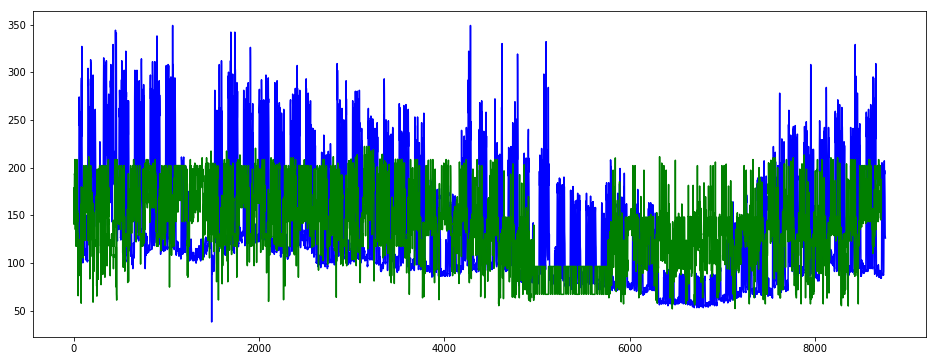

In [71]:
y_train_pred_1 = simple_rnn_1.predict(X_train_rnn)
y_train_pred_2 = simple_rnn_2.predict(X_train_rnn)
y_test_pred_1  = simple_rnn_1.predict(X_test_rnn)
y_test_pred_2  = simple_rnn_2.predict(X_test_rnn)


plt.figure(figsize=(16, 6))
plt.plot(y_train.iloc[:, 0], color='blue')
plt.plot(y_train_pred_1, color='green')
plt.show()

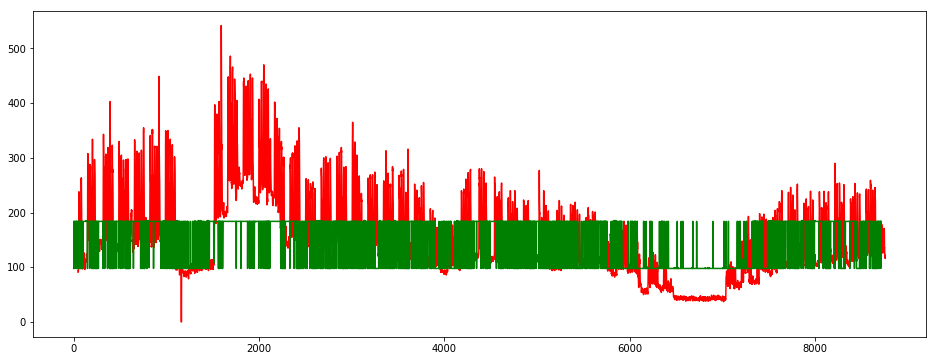

In [72]:
plt.figure(figsize=(16, 6))
plt.plot(y_train.iloc[:, 1], color='red')
plt.plot(y_train_pred_2, color='green')
plt.show()

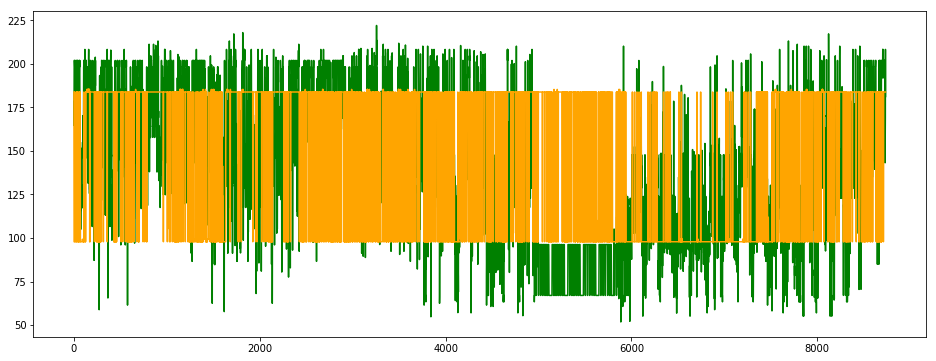

In [73]:
plt.figure(figsize=(16, 6))
plt.plot(y_test_pred_1, color='green')
plt.plot(y_test_pred_2, color='orange')
plt.show()

## GRU

Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory (LSTM) with forget gate but has fewer parameters than LSTM, as it lacks an output gate. GRU's performance on certain tasks of polyphonic music modeling and speech signal modeling was found to be similar to that of LSTM. GRUs have been shown to exhibit even better performance on certain smaller datasets.

However, as shown by Gail Weiss & Yoav Goldberg & Eran Yahav, the LSTM is "strictly stronger" than the GRU as it can easily perform unbounded counting, while the GRU cannot. That's why the GRU fails to learn simple languages that are learnable by the LSTM.

Similarly, as shown by Denny Britz & Anna Goldie & Minh-Thang Luong & Quoc Le of Google Brain, LSTM cells consistently outperform GRU cells in "the first large-scale analysis of architecture variations for Neural Machine Translation.

https://en.wikipedia.org/wiki/Gated_recurrent_unit

In [74]:
def my_GRU():
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True))
    model.add(GRU(units=32, return_sequences=False))
    model.add(Dense(units=1, activation='linear'))
    return model


gru_1, gru_2 = my_GRU(), my_GRU()
gru_1.compile(optimizer='SGD', loss='mean_squared_error')
gru_2.compile(optimizer='SGD', loss='mean_squared_error')


gru_1.fit(x=X_train_rnn, y=np.array(y_train.iloc[:,0]), epochs=20, batch_size=32)

Epoch 1/20
8712/8712 [==============================] - 8s 946us/sample - loss: 4140.4470
Epoch 2/20
8712/8712 [==============================] - 7s 829us/sample - loss: 2775.6613
Epoch 3/20
8712/8712 [==============================] - 7s 834us/sample - loss: 2582.9657
Epoch 4/20
8712/8712 [==============================] - 7s 834us/sample - loss: 2586.7794
Epoch 5/20
8712/8712 [==============================] - 7s 836us/sample - loss: 2607.1739
Epoch 6/20
8712/8712 [==============================] - 7s 835us/sample - loss: 2584.2904
Epoch 7/20
8712/8712 [==============================] - 7s 838us/sample - loss: 2497.3655
Epoch 8/20
8712/8712 [==============================] - 7s 838us/sample - loss: 2488.9214
Epoch 9/20
8712/8712 [==============================] - 7s 842us/sample - loss: 2455.1357
Epoch 10/20
8712/8712 [==============================] - 7s 840us/sample - loss: 2407.8460
Epoch 11/20
8712/8712 [==============================] - 7s 841us/sample - loss: 2365.4689
Epoch 12

In [75]:
gru_2.fit(x=X_train_rnn, y=np.array(y_train.iloc[:,1]), epochs=20, batch_size=32)

Epoch 1/20
8712/8712 [==============================] - 8s 915us/sample - loss: 4867.0947
Epoch 2/20
8712/8712 [==============================] - 7s 832us/sample - loss: 3309.2133
Epoch 3/20
8712/8712 [==============================] - 7s 833us/sample - loss: 3212.8495
Epoch 4/20
8712/8712 [==============================] - 7s 833us/sample - loss: 3180.4730
Epoch 5/20
8712/8712 [==============================] - 7s 853us/sample - loss: 3156.5066
Epoch 6/20
8712/8712 [==============================] - 8s 891us/sample - loss: 3167.0353
Epoch 7/20
8712/8712 [==============================] - 8s 874us/sample - loss: 3118.7520
Epoch 8/20
8712/8712 [==============================] - 7s 852us/sample - loss: 3020.1702
Epoch 9/20
8712/8712 [==============================] - 8s 863us/sample - loss: 3062.5642
Epoch 10/20
8712/8712 [==============================] - 7s 857us/sample - loss: 3062.4002
Epoch 11/20
8712/8712 [==============================] - 7s 845us/sample - loss: 3042.2752
Epoch 12

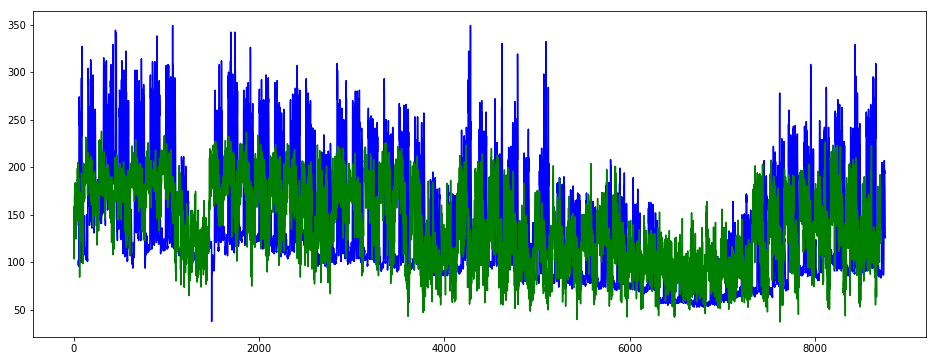

In [76]:
y_train_pred_1 = gru_1.predict(X_train_rnn)
y_train_pred_2 = gru_2.predict(X_train_rnn)
y_test_pred_1  = gru_1.predict(X_test_rnn)
y_test_pred_2  = gru_2.predict(X_test_rnn)


plt.figure(figsize=(16, 6))
plt.plot(y_train.iloc[:, 0], color='blue')
plt.plot(y_train_pred_1, color='green')
plt.show()

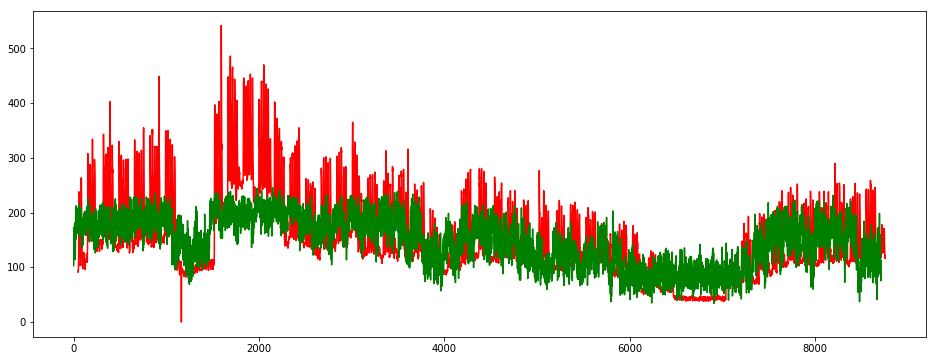

In [77]:
plt.figure(figsize=(16, 6))
plt.plot(y_train.iloc[:, 1], color='red')
plt.plot(y_train_pred_2, color='green')
plt.show()

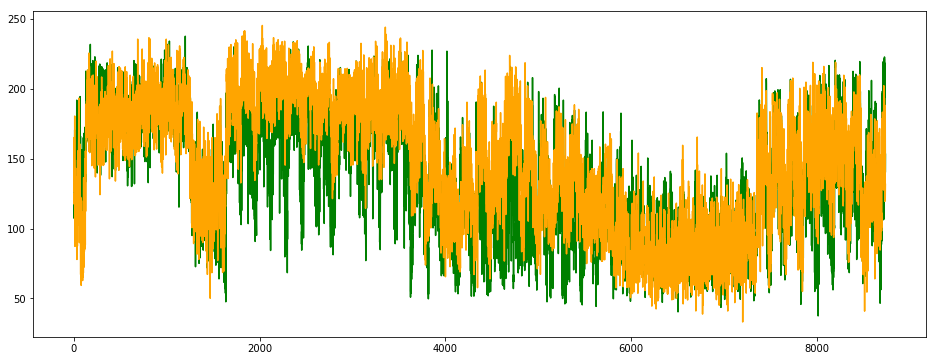

In [78]:
plt.figure(figsize=(16, 6))
plt.plot(y_test_pred_1, color='green')
plt.plot(y_test_pred_2, color='orange')
plt.show()

---
# Results comparison and conclusions

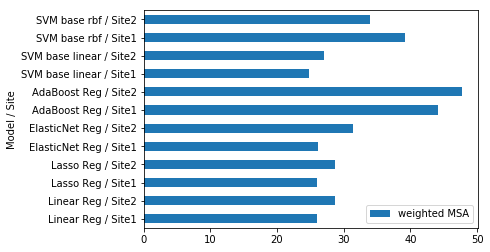

In [39]:
df_score = pd.DataFrame({'Model / Site':['Linear Reg / Site1', 'Linear Reg / Site2',
                                  'Lasso Reg / Site1', 'Lasso Reg / Site2',
                                  'ElasticNet Reg / Site1', 'ElasticNet Reg / Site2',
                                  'SVM base linear / Site1', 'SVM base linear / Site2',
                                  'SVM base rbf / Site1', 'SVM base rbf / Site2'],
                        'weighted MSA':[res_lin_reg_1, res_lin_reg_2, 
                                        res_lasso_1, res_lasso_2, 
                                        res_elasticnet_1, res_elasticnet_2,  
                                        res_svr_1, res_svr_2, 
                                        res_svr_base_rbf_1, res_svr_base_rbf_2]})
ax = df_score.plot.barh(y='weighted MSA', x='Model / Site')

* Except the SVM model with an rbf base, all models doesn't perform better for the 2nd site, which can be explained by the fact that site doesn't present regular oscillations.
* Finally, Linear Reg, Lasso and ElasticNet have similar results, because regularization doesn't help to predict well spikes
* SVM base rbf and Adaboost have worst results than linear regression w/ or w/o regularization.

All these models don't work well when it comes to time series, in the next part we'll use the SARIMA library and Recurrent Neural Networks R.N.N which are more appropriate for this kind of prediction.

# Ideas

* fill NA with continuous values, mean or median of the week depending where NAs are
* open data for missing temperatures
* add sunlight hours
* try w & w/o get dummies for hours, weekdays
* scaler : fit transform on X/y train & transform on X test
* more function for automation
* RNN
* SARIMA or ARIMA

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://www.kaggle.com/niyamatalmass/machine-learning-for-time-series-analysis
    
https://mapr.com/blog/deep-learning-tensorflow/
    
https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
    
https://machinelearningmastery.com/how-to-grid-search-deep-learning-models-for-time-series-forecasting/
    
Really interesting posts :

https://machinelearningmastery.com/multi-step-time-series-forecasting-with-machine-learning-models-for-household-electricity-consumption/
    
https://medium.com/@alexrachnog/deep-learning-the-final-frontier-for-signal-processing-and-time-series-analysis-734307167ad6
    
https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a